In [ ]:
# Library Loading...
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
import imageio

from skimage.transform import rescale
from skimage.filters import gabor_kernel
from sklearn.cluster import KMeans

In [ ]:
# Feature Computation Function
def compute_feats(image, kernels, resize_size):
    feats = np.zeros((int(image.shape[0]//resize_size), int(image.shape[1]//resize_size), len(kernels)*2), dtype=np.double)

    # For multiple kernels,
    for k, kernel in enumerate(kernels):

        # Convolve the filters
        filtered = ndi.convolve(image, kernel, mode='wrap')

        # Grid-wise Average
        filtered_grid_avg = rescale(filtered, 1/resize_size)
        filtered_square_grid_avg = rescale(filtered*filtered, 1/resize_size)

        feats[:, :, 2*k] = filtered_grid_avg

        # Grid-wise Standard Deviation
        feats[:, :, 2*k + 1] = np.sqrt(filtered_square_grid_avg - filtered_grid_avg*filtered_grid_avg)

    return feats

In [ ]:
# prepare filter bank kernels
kernels = []

# Orientation
for theta in range(4):
    theta = theta / 4. * np.pi

    # Sigma
    for sigma in (1, 6):

        # Frequency
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
            # Stack the filters into the filter  bank
            kernels.append(kernel)

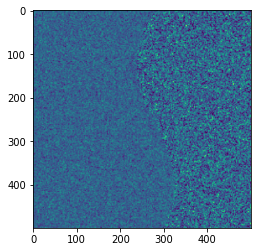

In [ ]:
# Image Load & Show
image = np.mean(imageio.imread('texture_01.jpg'), axis=2)
plt.imshow(image)

In [ ]:
# Feature Acquisition
feats = compute_feats(image, kernels, 20.0)

In [ ]:
# K-means Clustering
feats_stack = np.reshape(feats[1:-1, 1:-1,:], [(feats.shape[0]-2)*(feats.shape[1]-2), feats.shape[2]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(feats_stack)

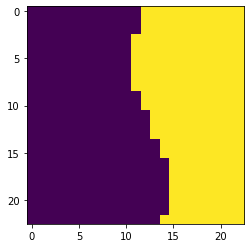

In [ ]:
# Texture Segmentation Plotting
cluster_texture = np.reshape(kmeans.labels_, [feats.shape[0]-2, feats.shape[1]-2])
plt.imshow(cluster_texture)

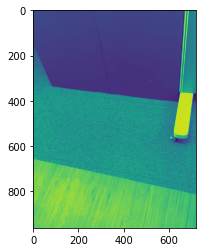

In [ ]:
# Image Load & Show
image = np.mean(imageio.imread('texture_02.jpg'), axis=2)
plt.imshow(image)

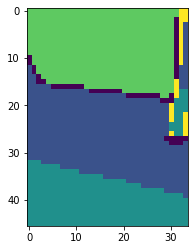

In [ ]:
# Feature Acquisition
feats = compute_feats(image, kernels, 20.0)
# K-means Clustering
feats_stack = np.reshape(feats[1:-1, 1:-1], [(feats.shape[0]-2)*(feats.shape[1]-2), feats.shape[2]])
kmeans = KMeans(n_clusters=5, random_state=0).fit(feats_stack)
# Texture Segmentation Plotting
cluster_texture = np.reshape(kmeans.labels_, [feats.shape[0]-2, feats.shape[1]-2])
plt.imshow(cluster_texture)

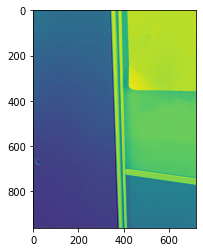

In [ ]:
# Image Load & Show
image = np.mean(imageio.imread('texture_03.jpg'), axis=2)
plt.imshow(image)

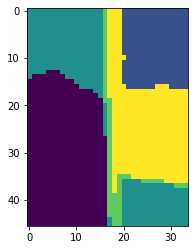

In [ ]:
# Feature Acquisition
feats = compute_feats(image, kernels, 20.0)
# K-means Clustering
feats_stack = np.reshape(feats[1:-1, 1:-1], [(feats.shape[0]-2)*(feats.shape[1]-2), feats.shape[2]])
kmeans = KMeans(n_clusters=5, random_state=0).fit(feats_stack)
# Texture Segmentation Plotting
cluster_texture = np.reshape(kmeans.labels_, [feats.shape[0]-2, feats.shape[1]-2])
plt.imshow(cluster_texture)

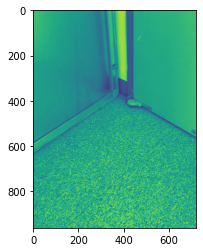

In [ ]:
# Image Load & Show
image = np.mean(imageio.imread('texture_04.jpg'), axis=2)
plt.imshow(image)

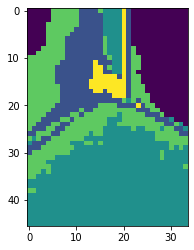

In [ ]:
# Feature Acquisition
feats = compute_feats(image, kernels, 20.0)
# K-means Clustering
feats_stack = np.reshape(feats[1:-1, 1:-1], [(feats.shape[0]-2)*(feats.shape[1]-2), feats.shape[2]])
kmeans = KMeans(n_clusters=5, random_state=0).fit(feats_stack)
# Texture Segmentation Plotting
cluster_texture = np.reshape(kmeans.labels_, [feats.shape[0]-2, feats.shape[1]-2])
plt.imshow(cluster_texture)